In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import urllib2 as url
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
import random
import pylab

Populating the interactive namespace from numpy and matplotlib


/Users/jiangzeyu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# rossmann, store, & test csv files 
store = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/store.csv')
states = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/store_states.csv')
test = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/test.csv')
sales = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/train.csv', dtype={'StateHoliday': np.character})

In [3]:
# merge 
data = pd.merge(sales, store, on='Store')
newdata = pd.merge(data, states, on='Store')

In [4]:
newdata.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE


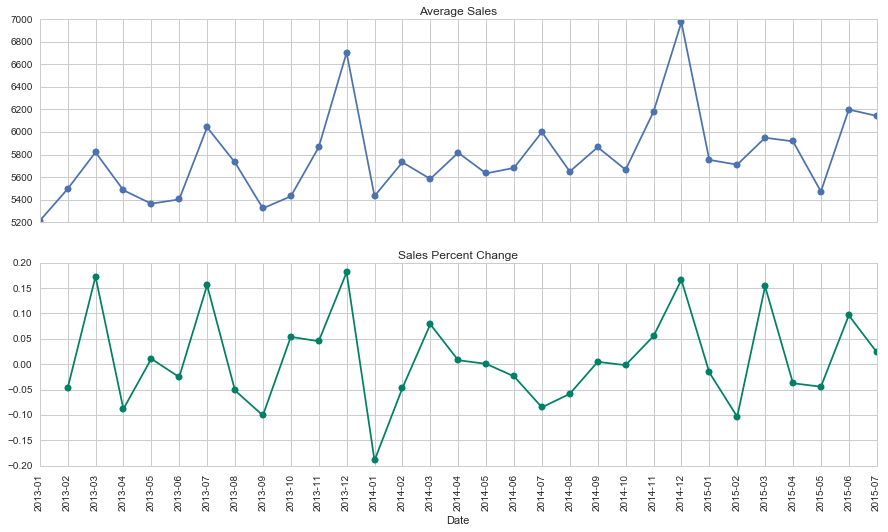

In [11]:
# Date

# Create new columns for year and month 
sales['Year']  = sales['Date'].apply(lambda x: int(str(x)[:4]))
sales['Month'] = sales['Date'].apply(lambda x: int(str(x)[5:7]))

test['Year']  = test['Date'].apply(lambda x: int(str(x)[:4]))
test['Month'] = test['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day) because it will useful in visualization
sales['Date'] = sales['Date'].apply(lambda x: (str(x)[:7]))
test['Date'] = test['Date'].apply(lambda x: (str(x)[:7]))

# group by Date to get average sales and precent change
average_sales    = sales.groupby('Date')["Sales"].mean()
pct_change_sales = sales.groupby('Date')["Sales"].sum().pct_change()


# plot
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales 
ax1 = average_sales.plot(ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales 
ax2 = pct_change_sales.plot(ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
ax2.set_xticks(range(len(pct_change_sales)))
ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)